In [1]:

import numpy as np
import pandas as pd
import lux
lux.logger = True

import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use("ggplot") #Define the style of the plot

import warnings #What to do with warnings
warnings.filterwarnings("ignore") #Ignore the warnings

import scipy.stats as sts
import pylab

from pmdarima import auto_arima

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose #Describes the time data
from statsmodels.tsa.stattools import adfuller #Check if data is stationary
from statsmodels.tsa.stattools import coint #Check if for cointegration
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf #Compute lag for ARIMA
from statsmodels.tsa.arima_model import ARIMA #Predictions and Forecasting
from statsmodels.tsa.statespace.sarimax import SARIMAX # sarimax

## Accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
df = pd.read_csv('Nifty50(2010-20).csv') ## 2010 to 2020
df.head()

,Date,Nifty50,reliance,infosys,hdfc,hdfcbank
0,2010-01-04,5232.20,1075.50,2612.60,2674.35,1705.70
1,2010-01-05,5277.90,1070.70,2621.35,2683.45,1707.20
2,2010-01-06,5281.80,1088.00,2583.10,2696.35,1708.35
3,2010-01-07,5263.10,1106.05,2525.05,2646.15,1712.80
4,2010-01-08,5244.75,1103.15,2464.20,2600.05,1715.05


In [23]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [24]:
df.tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
df.dtypes

Date         object
Nifty50     float64
reliance    float64
infosys     float64
hdfc        float64
hdfcbank    float64
dtype: object


In [26]:
df.shape

(2730, 6)

In [27]:
df.isna().sum()

Date        0
Nifty50     0
reliance    0
infosys     0
hdfc        0
hdfcbank    0
dtype: int64


In [28]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [29]:
df.Date = pd.to_datetime(df.Date) ## to make is dd/mm/yy format

In [30]:
df.head()

,Date,Nifty50,reliance,infosys,hdfc,hdfcbank
0,2010-01-04,5232.20,1075.50,2612.60,2674.35,1705.70
1,2010-01-05,5277.90,1070.70,2621.35,2683.45,1707.20
2,2010-01-06,5281.80,1088.00,2583.10,2696.35,1708.35
3,2010-01-07,5263.10,1106.05,2525.05,2646.15,1712.80
4,2010-01-08,5244.75,1103.15,2464.20,2600.05,1715.05


In [31]:
df.dtypes

Date        datetime64[ns]
Nifty50            float64
reliance           float64
infosys            float64
hdfc               float64
hdfcbank           float64
dtype: object


In [32]:
df.set_index('Date' , inplace= True)


In [33]:
df.tail()

,Nifty50,reliance,infosys,hdfc,hdfcbank
Date,,,,,
2020-12-24,13749.25,1994.15,1236.05,2455.15,1397.10
2020-12-28,13873.20,2003.30,1240.30,2476.45,1412.85
2020-12-29,13932.60,1990.05,1250.30,2518.95,1427.20
2020-12-30,13981.95,1995.50,1246.80,2518.05,1432.50
2020-12-31,13981.75,1985.30,1255.80,2558.65,1436.30


In [34]:
Train = df[df.index < pd.to_datetime('2018-01-01')]
Test = df[df.index >= pd.to_datetime('2018-01-01')]

## With Exogenous

In [35]:
model_autox_pred = auto_arima(Train['Nifty50'],exogenous = Train[['reliance' , 'infosys' ,'hdfc' , 'hdfcbank']],
                 m = 5 ,max_p=5 , max_q= 5 , max_P= 5 , max_Q= 5 ,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=21666.868, Time=4.35 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=21665.763, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=21660.939, Time=0.81 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=21660.809, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=21669.203, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=21659.092, Time=0.35 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=21660.796, Time=1.17 sec
 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=21662.733, Time=1.37 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=21661.026, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[5] intercept   : AIC=21660.982, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=21659.222, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[5] intercept   : AIC=21662.968, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[5]             : AIC=21661.870, Time=0.31 sec

Best model:  ARIMA(0,1,1)(0,0,0)[5] intercept
Total fit time: 11.713 seconds


In [36]:
model_autox_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1987
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -10822.546
Date:                Sat, 19 Jun 2021   AIC                          21659.092
Time:                        22:27:31   BIC                          21698.249
Sample:                             0   HQIC                         21673.475
                               - 1987                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7681      1.526      1.814      0.070      -0.223       5.759
reliance       0.9715      0.012     83.243      0.000       0.949       0.994
infosys        0.1827      0.004     44.575      0.000       0.175       0.191
hdfc           0.1736      0.004     48.281      0.000       0.167       0.181
hdfcbank       0.2211      0.004     52.514      0.000       0.213       0.229
ma.L1          0.0669      0.024      2.806      0.005       0.020       0.114
sigma2      3173.4530     67.394     47.088      0.000    3041.362    3305.544
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             67017.71
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             1.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:No supported index is available. Prediction results will be given with an integer index beginning at `start`.


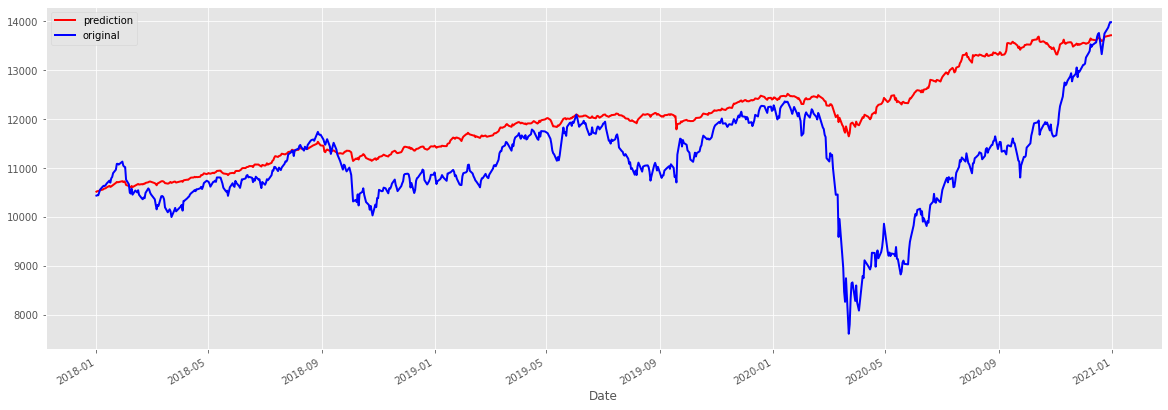

In [37]:
df_result_price_ex = pd.DataFrame(model_autox_pred.predict(n_periods = len(Test), 
                                                  exogenous = Test[['reliance' , 'infosys' ,'hdfc' , 'hdfcbank']]) ,
                        index =Test.index)
df_result_price_ex.plot(figsize=(20,5) ,color = "red" , lw = 2)
Test['Nifty50'].plot(figsize=(20,7),color = "blue" ,lw = 2)
plt.legend(['prediction' , 'original'])
plt.show()

In [68]:
print( "RMSE :" ,np.sqrt(mean_squared_error(Test['Nifty50'],df_result_price_ex)))
print("MAE :" , mean_absolute_error(Test['Nifty50'],df_result_price_ex))

RMSE : 972.1682831460294
MAE : 723.6572982922828


In [38]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('NiftyDashModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(model_autox_pred, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\ASUS\Desktop\playground\Python\Time_Series\Stock


## Fitting Model for the data AFTER April 2020 

In [71]:
recent_df = df[df.index >= pd.to_datetime('2020-03-01')]
recent_df.head()

,Nifty50,reliance,infosys,hdfc,hdfcbank
Date,,,,,
2020-03-02,11132.75,1316.15,741.05,2179.65,1179.60
2020-03-03,11303.30,1342.85,747.00,2191.40,1181.80
2020-03-04,11251.00,1339.70,758.75,2206.05,1148.85
2020-03-05,11269.00,1311.15,754.60,2195.05,1151.35
2020-03-06,10989.45,1271.00,738.95,2109.45,1134.90


In [72]:
recent_df.shape

(209, 5)

<AxesSubplot:xlabel='Date'>

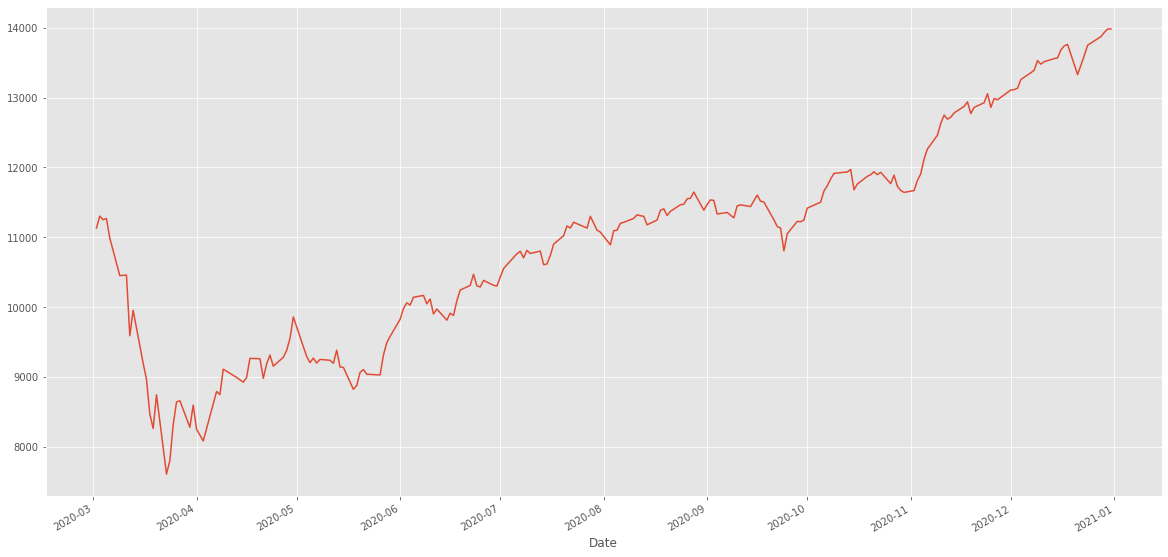

In [73]:
recent_df.Nifty50.plot()

In [74]:
model_auto_pred = auto_arima(recent_df['Nifty50'],
                 max_p=5 , max_q= 5 , max_P= 5 , max_Q= 5 ,trace=True,
                            stepwise=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2798.441, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2799.886, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2798.873, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2799.497, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2798.852, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2796.597, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2797.337, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2800.107, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2793.846, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2797.558, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2799.037, Time=0.36 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2797.784, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=2

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


                             ARIMA Model Results                              
Dep. Variable:              D.Nifty50   No. Observations:                  208
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -1392.483
Method:                       css-mle   S.D. of innovations            195.466
Date:                Sat, 19 Jun 2021   AIC                           2796.965
Time:                        23:38:27   BIC                           2816.991
Sample:                             1   HQIC                          2805.063
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.7716     17.290      0.797      0.426     -20.115      47.658
ar.L1.D.Nifty50     0.6576      0.238      2.768      0.006       0.192       1.123
ma.L1.D.Nifty50    -0.8007      

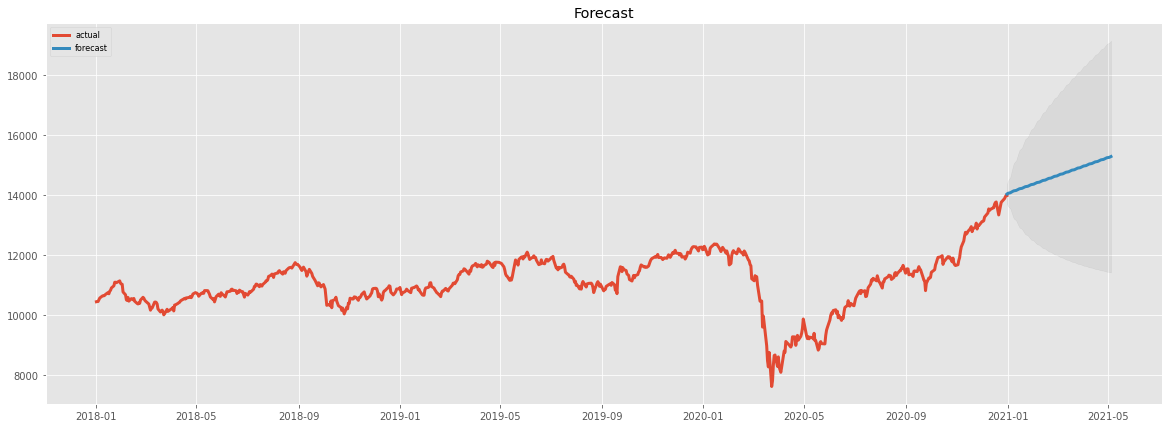

In [75]:
# Build Model
 
model = ARIMA(recent_df['Nifty50'], order=(1,1,3))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

## 90 business days i.e. 3 months
index_future_dates=pd.date_range(start='2020-12-31', periods=90, freq='B')
# Forecast
fc, se, conf = fitted.forecast(len(index_future_dates), alpha=0.1)  # 95% conf

# Make as pandas series

fc_series = pd.Series(fc, index=index_future_dates)
lower_series = pd.Series(conf[:, 0], index=index_future_dates)
upper_series = pd.Series(conf[:, 1], index=index_future_dates)
future_df = pd.DataFrame({"future_price" : fc_series , "lower" : lower_series , "upper" : upper_series} , index = index_future_dates)

# Plot
plt.figure(figsize=(20,7))

plt.plot(Test['Nifty50'], label='actual' ,lw = 3)
plt.plot(fc_series, label='forecast' , lw = 3)
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [54]:
future_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [176]:
print(fc_series.mean(),fc_series.std())

15383.60293003343 803.2345725072149


Actual prices of Nifty50 index on
* 1 Feb : 14281.20
* 1 march:  14761.55	
* 1 April: 14867.35

In [177]:
future_df.loc[["2021-02-1" ,"2021-03-1" ,"2021-04-1"]]

,future_price,lower,upper
2021-02-01,14691.806583,13680.444779,15703.168387
2021-03-01,15306.734004,13926.619082,16686.848926
2021-04-01,16013.900537,14305.432986,17722.368088


We Can see there was high of 15336.30 on 12 March but the second wave of covid 19 started spreading resulting in lockdown in India again !

Our model is not performing well on shocks because Training dataset has no such shocks. <br>
We can include March 2020 data into it but that was huge shock to absorb

In [178]:
recent_df = df[df.index >= pd.to_datetime('2019-01-01')]
recent_df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [179]:
model_auto_pred = auto_arima(recent_df['Nifty50'],
                 max_p=5 , max_q= 5 , max_P= 5 , max_Q= 5 ,trace=True,
                            stepwise=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6392.433, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6394.251, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6393.792, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6394.156, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6393.075, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6390.566, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6392.307, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6394.724, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6388.605, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6394.005, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6388.347, Time=0.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6367.846, Time=0.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6387.210, Time=0.48 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=6369.241, Time=0.97 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

                             ARIMA Model Results                              
Dep. Variable:              D.Nifty50   No. Observations:                  496
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3175.767
Method:                       css-mle   S.D. of innovations            145.958
Date:                Sun, 02 May 2021   AIC                           6367.533
Time:                        19:16:44   BIC                           6401.186
Sample:                             1   HQIC                          6380.743
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.2546      8.886      0.704      0.482     -11.163      23.672
ar.L1.D.Nifty50    -0.6792      0.126     -5.411      0.000      -0.925      -0.433
ar.L2.D.Nifty50     0.4281      

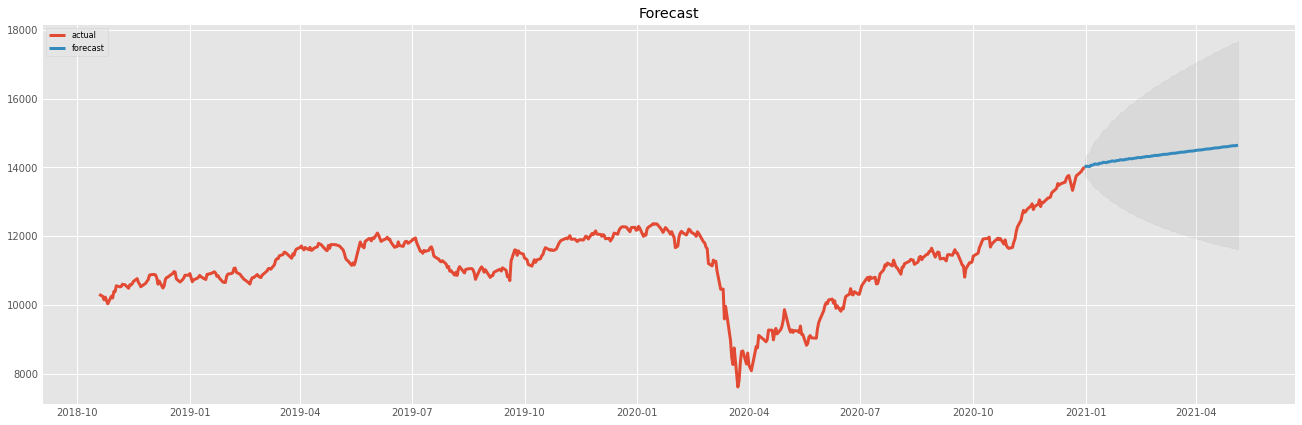

In [180]:
# Build Model
 
model = ARIMA(recent_df['Nifty50'], order=(3,1,3))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

## 90 business days i.e. 3 months
index_future_dates=pd.date_range(start='2020-12-31', periods=90, freq='B')
# Forecast
fc, se, conf = fitted.forecast(len(index_future_dates), alpha=0.1)  # 95% conf

# Make as pandas series

fc_series = pd.Series(fc, index=index_future_dates)
lower_series = pd.Series(conf[:, 0], index=index_future_dates)
upper_series = pd.Series(conf[:, 1], index=index_future_dates)
future_df = pd.DataFrame({"future_price" : fc_series , "lower" : lower_series , "upper" : upper_series} , index = index_future_dates)

# Plot
plt.figure(figsize=(20,7))

plt.plot(Test['Nifty50'], label='actual' ,lw = 3)
plt.plot(fc_series, label='forecast' , lw = 3)
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Actual prices of Nifty50 index on
* 1 Feb : 14281.20
* 1 march:  14761.55
* 1 April: 14867.35

In [181]:
future_df.loc[["2021-02-1" ,"2021-03-1" ,"2021-04-1"]]

,future_price,lower,upper
2021-02-01,14214.273223,12790.671163,15637.875283
2021-03-01,14346.458901,12310.415047,16382.502756
2021-04-01,14492.661558,11922.894492,17062.428625


This seems more accurate now

## Check Volatility

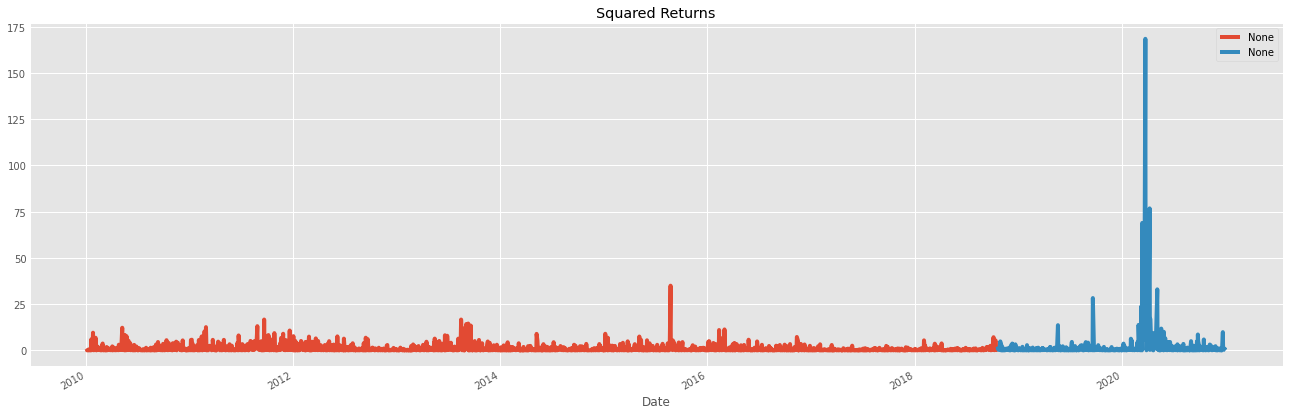

In [79]:
plt.figure(figsize= (20,7))
Train['nifty_sq_returns'].plot()
Test['nifty_sq_returns'].plot()
# Train['reliance_sq_returns'].plot()
# Train['infosys_sq_returns'].plot()
# Train['hdfc_sq_returns'].plot()
# Train['hdfcbank_sq_returns'].plot()
plt.legend()
plt.title("Squared Returns")
plt.show()

## Check for returns

In [80]:
model_auto_pred_ret = auto_arima(Train['nifty_returns'], m = 5 ,max_p=5 , max_q= 5 , max_P= 5 , max_Q= 5 ,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=6101.957, Time=2.38 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=6101.391, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=6095.536, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=6095.455, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=6102.429, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=6093.853, Time=0.11 sec
 ARIMA(0,0,1)(1,0,0)[5] intercept   : AIC=6095.447, Time=0.21 sec
 ARIMA(0,0,1)(1,0,1)[5] intercept   : AIC=6097.038, Time=0.96 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=6095.852, Time=0.32 sec
 ARIMA(0,0,2)(0,0,0)[5] intercept   : AIC=6095.851, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=6093.939, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[5] intercept   : AIC=6096.636, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[5]             : AIC=6094.532, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[5] intercept
Total fit time: 5.435 seconds


In [81]:
model_auto_pred_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2183
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -3043.926
Date:                Sun, 02 May 2021   AIC                           6093.853
Time:                        18:35:41   BIC                           6110.918
Sample:                             0   HQIC                          6100.091
                               - 2183                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0365      0.022      1.628      0.104      -0.007       0.080
ma.L1          0.0663      0.019      3.410      0.001       0.028       0.104
sigma2         0.9521      0.021     44.668      0.000       0.910       0.994
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               261.39
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

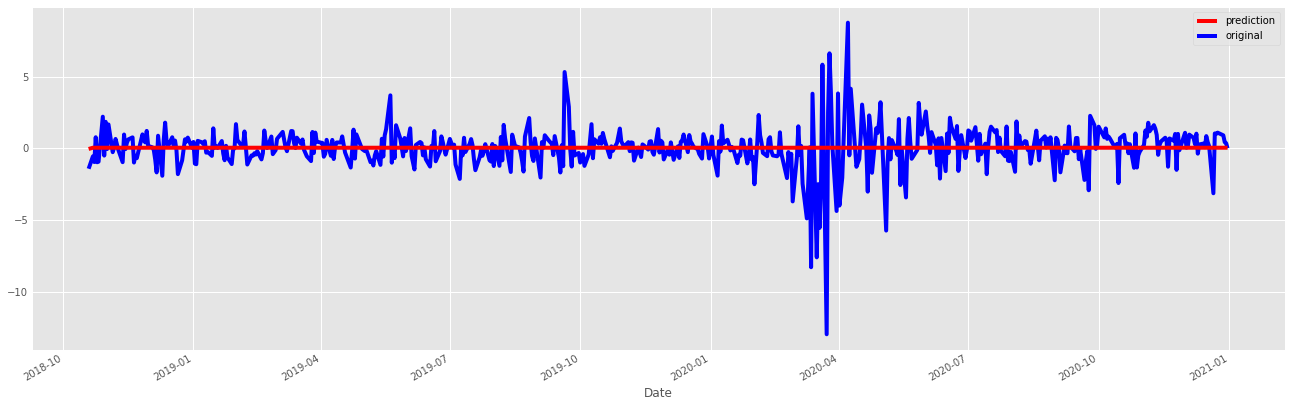

In [82]:

df_result_ret = pd.DataFrame(model_auto_pred_ret.predict(n_periods = len(Test)), index =Test.index)
                             
df_result_ret.plot(figsize=(20,7) ,color = "red" , zorder = 2)
Test['nifty_returns'].plot(figsize=(20,7),color = "blue" ,  zorder = 1)
plt.legend(['prediction' , 'original'])
plt.show()

In [83]:
print( "RMSE :" ,np.sqrt(mean_squared_error(Test['nifty_returns'],df_result_ret)))
print("MAE :" , mean_absolute_error(Test['nifty_returns'],df_result_ret))

RMSE : 1.4814145095047278
MAE : 0.9143260347586856


## With Exog

In [84]:
model_autox_pred_ret = auto_arima(Train['nifty_returns'],
                                  exogenous = Train[['reliance_returns' , 'infosys_returns' ,'hdfc_returns' , 'hdfcbank_returns']],
                 m = 5 ,max_p=5 , max_q= 5 , max_P= 5 , max_Q= 5 ,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=4485.327, Time=4.68 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=4483.293, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=4486.017, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=4486.044, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=4483.848, Time=0.37 sec
 ARIMA(0,0,0)(1,0,0)[5] intercept   : AIC=4484.962, Time=0.48 sec
 ARIMA(0,0,0)(0,0,1)[5] intercept   : AIC=4484.975, Time=0.49 sec
 ARIMA(0,0,0)(1,0,1)[5] intercept   : AIC=4486.145, Time=1.60 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=4484.327, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=4484.342, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=4486.251, Time=1.45 sec

Best model:  ARIMA(0,0,0)(0,0,0)[5] intercept
Total fit time: 11.101 seconds


In [85]:
model_autox_pred_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2183
Model:                        SARIMAX   Log Likelihood               -2235.646
Date:                Sun, 02 May 2021   AIC                           4483.293
Time:                        18:35:53   BIC                           4517.424
Sample:                             0   HQIC                          4495.770
                               - 2183                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0231      0.018      1.299      0.194      -0.012       0.058
reliance_returns     0.2078      0.002     86.923      0.000       0.203       0.212
infosys_returns      0.0785      0.002     48.461      0.000       0.075       0.082
hdfc_returns         0.1184      0.002     77.260      0.000       0.115       0.121
hdfcbank_returns     0.1172      0.001     82.422      0.000       0.114       0.120
sigma2               0.4540      0.010     45.846      0.000       0.435       0.473
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):            430940.33
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             4.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:No supported index is available. Prediction results will be given with an integer index beginning at `start`.


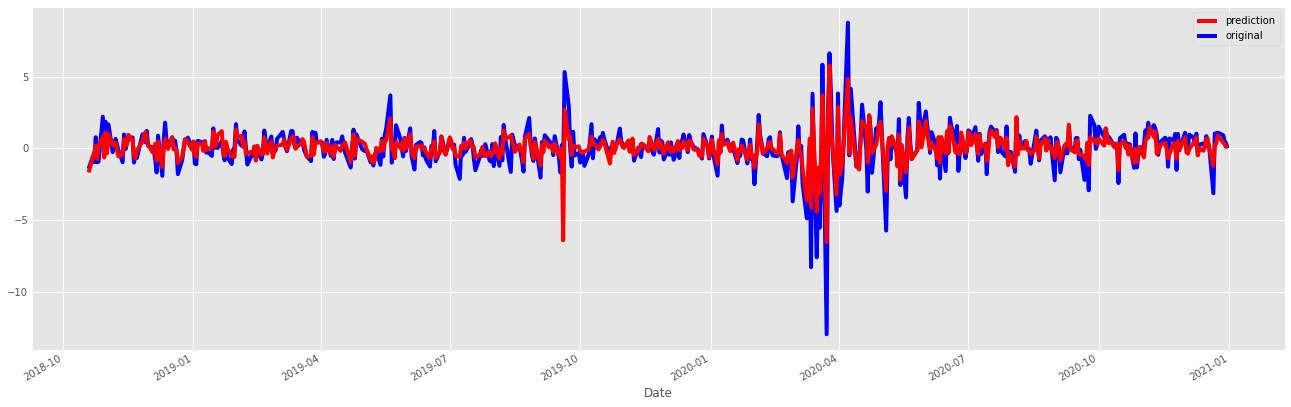

In [86]:

df_result_ret_exog = pd.DataFrame(model_autox_pred_ret.predict(n_periods = len(Test), 
                                                  exogenous = Test[['reliance_returns' , 'infosys_returns' ,'hdfc_returns' , 'hdfcbank_returns']]) ,
                        index =Test.index)
df_result_ret_exog.plot(figsize=(20,7) ,color = "red" , zorder = 2)
Test['nifty_returns'].plot(figsize=(20,7),color = "blue" ,  zorder = 1)
plt.legend(['prediction' , 'original'])
plt.show()

In [87]:
print( "RMSE :" ,np.sqrt(mean_squared_error(Test['nifty_returns'],df_result_ret_exog)))
print("MAE :" , mean_absolute_error(Test['nifty_returns'],df_result_ret_exog))

RMSE : 0.7761432687533112
MAE : 0.4982236733478867


## Seasonal Decompose

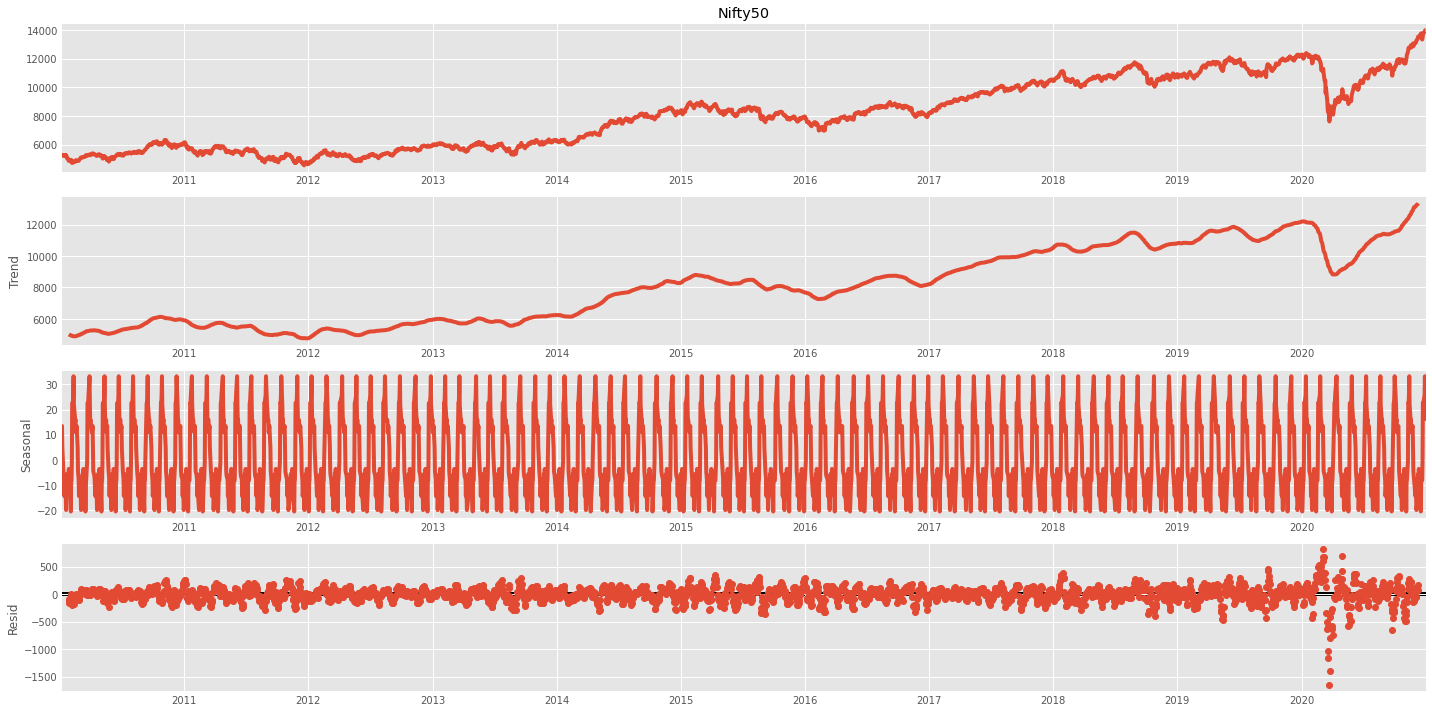

In [88]:

s_dec_add = seasonal_decompose(df.Nifty50, model='additive', period=30)
s_dec_add.plot()
plt.show()

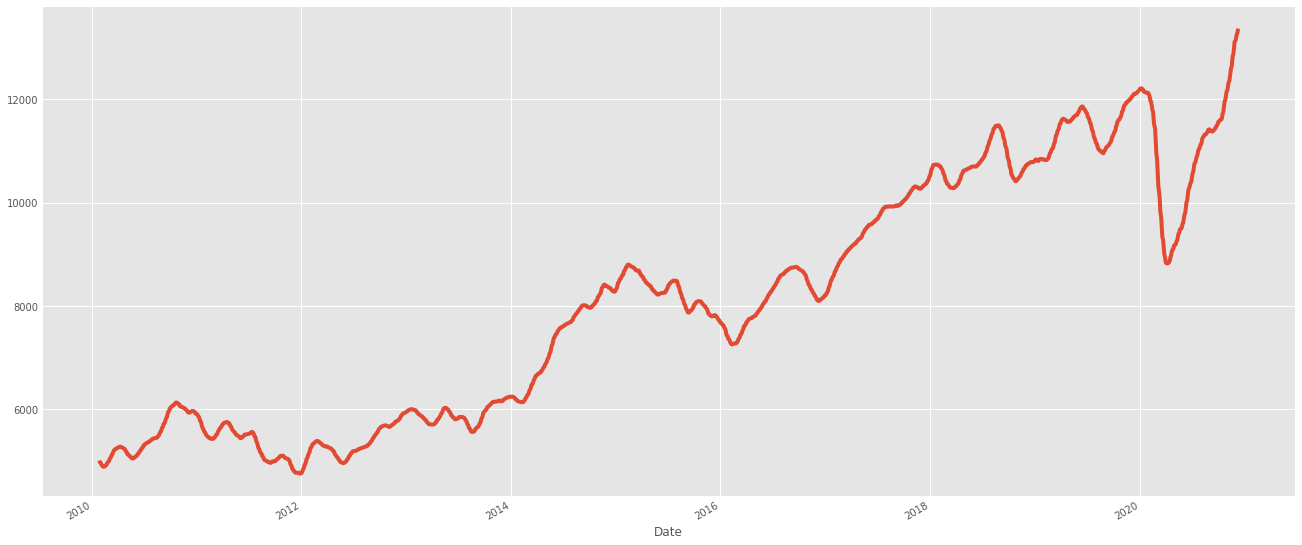

In [89]:
plt.figure(figsize=(20,10))
s_dec_add.trend.plot()
plt.show()

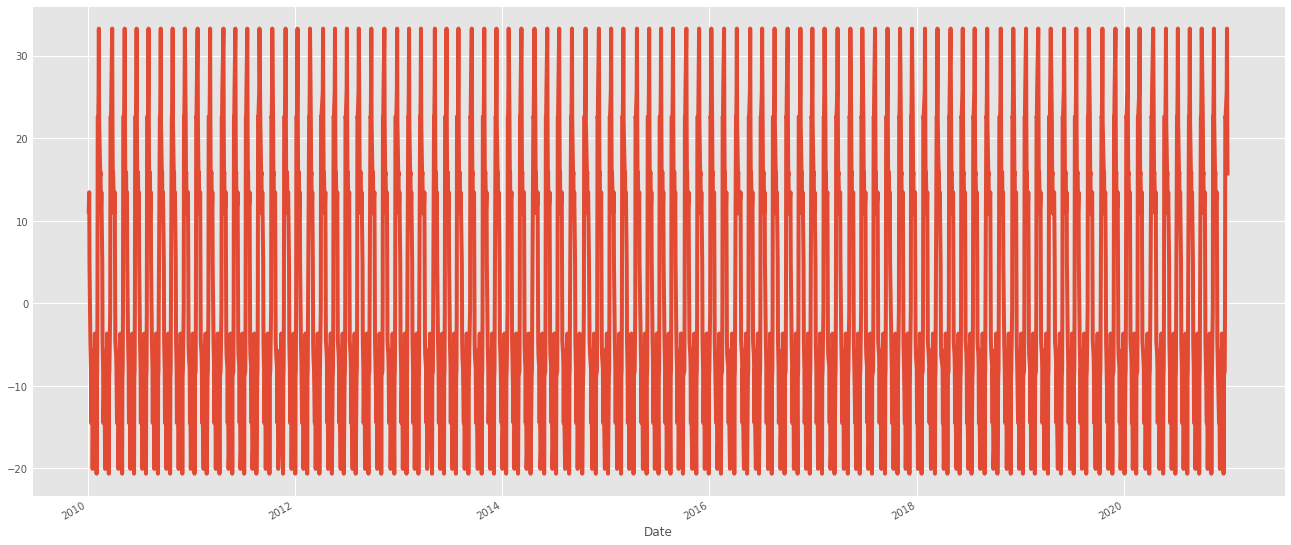

In [90]:
plt.figure(figsize=(20,10))
s_dec_add.seasonal.plot()
plt.show()

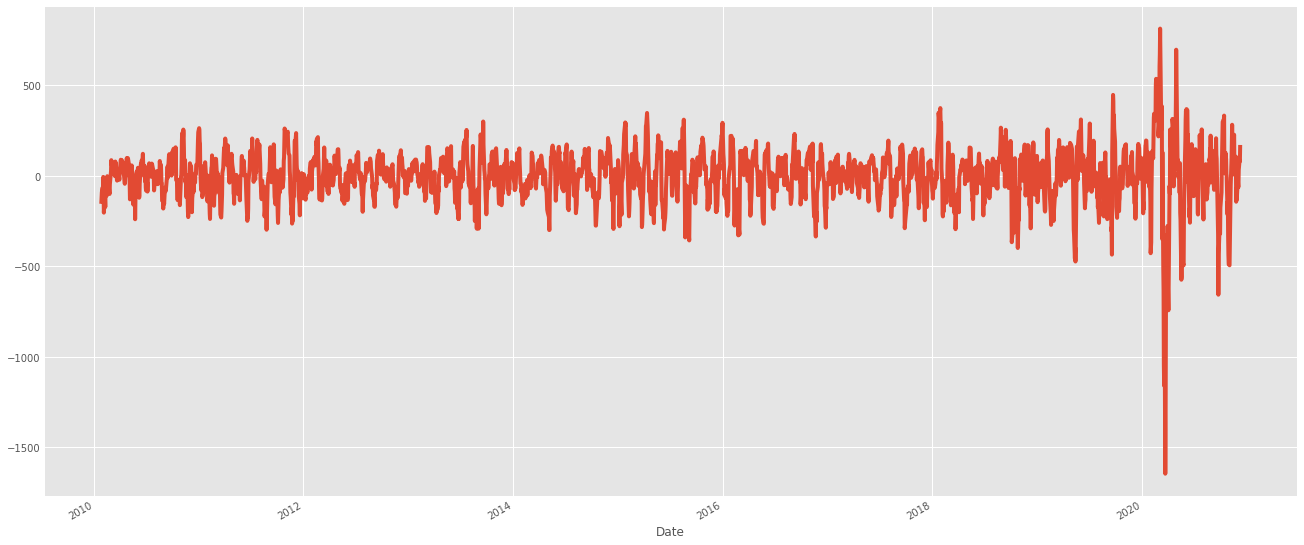

In [91]:
plt.figure(figsize=(20,10))
s_dec_add.resid.plot()
plt.show()

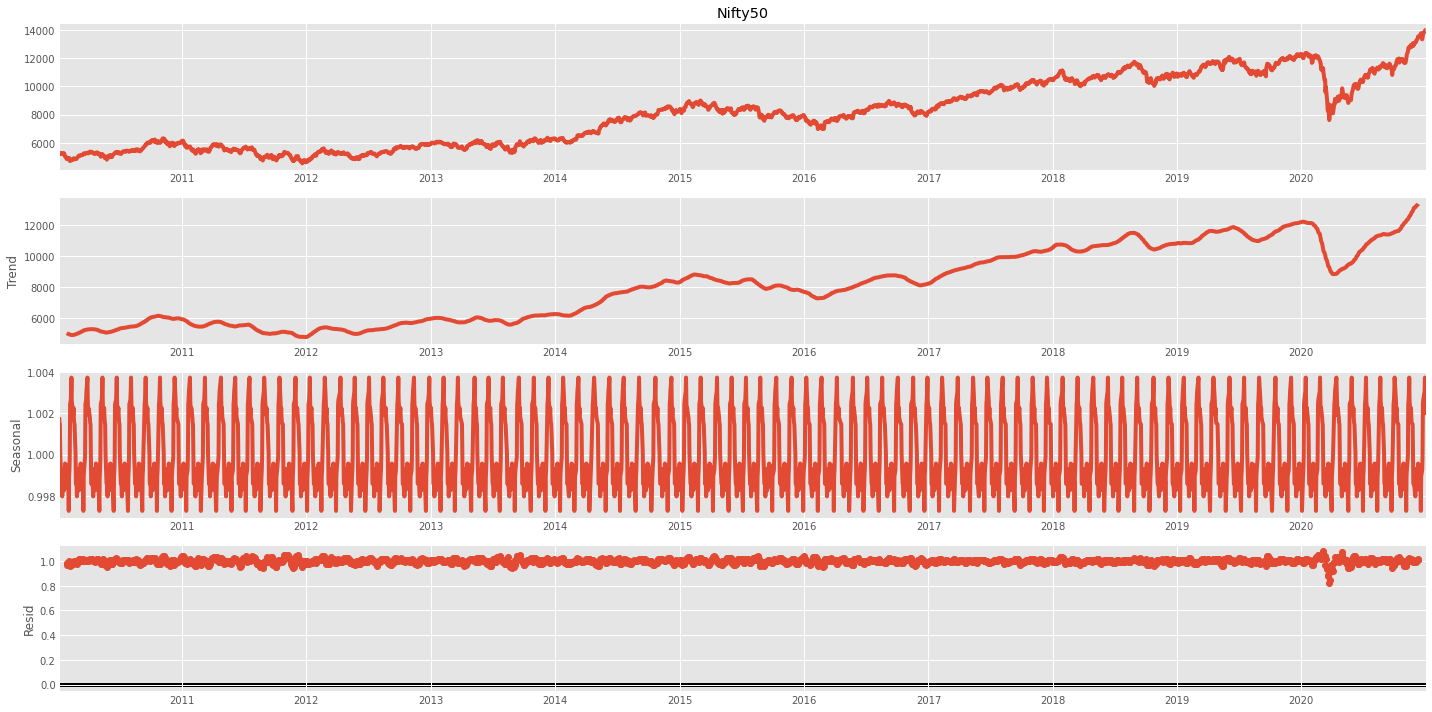

In [92]:
s_dec_mul = seasonal_decompose(df.Nifty50 , model="multiplicative" , period= 30)
s_dec_mul.plot()
plt.show()

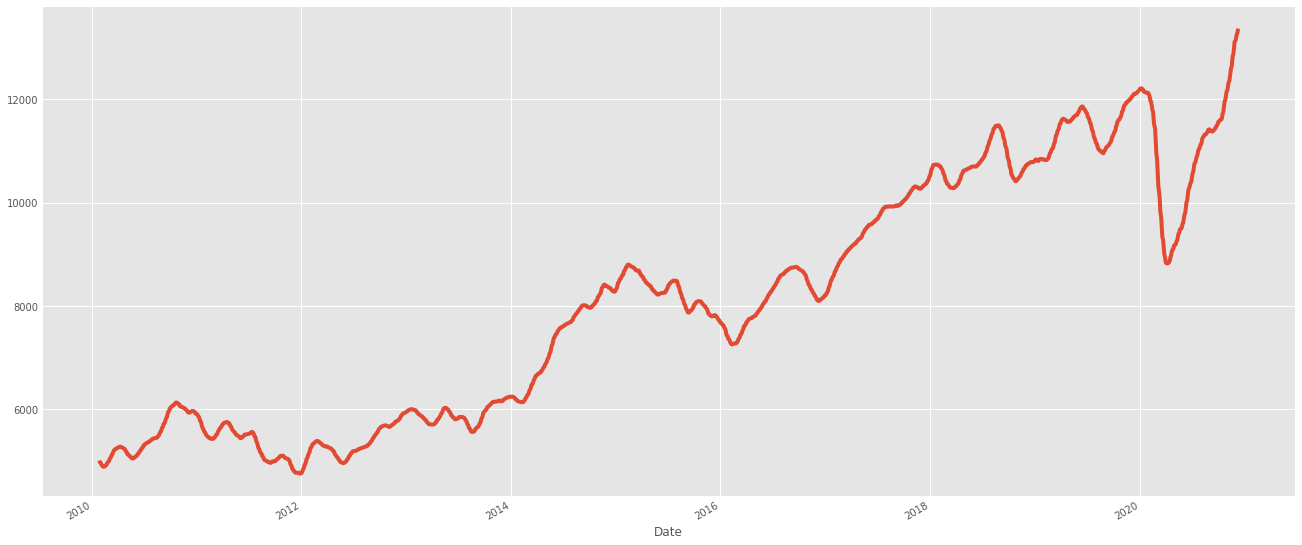

In [93]:
plt.figure(figsize=(20,10))
s_dec_mul.trend.plot()
plt.show()

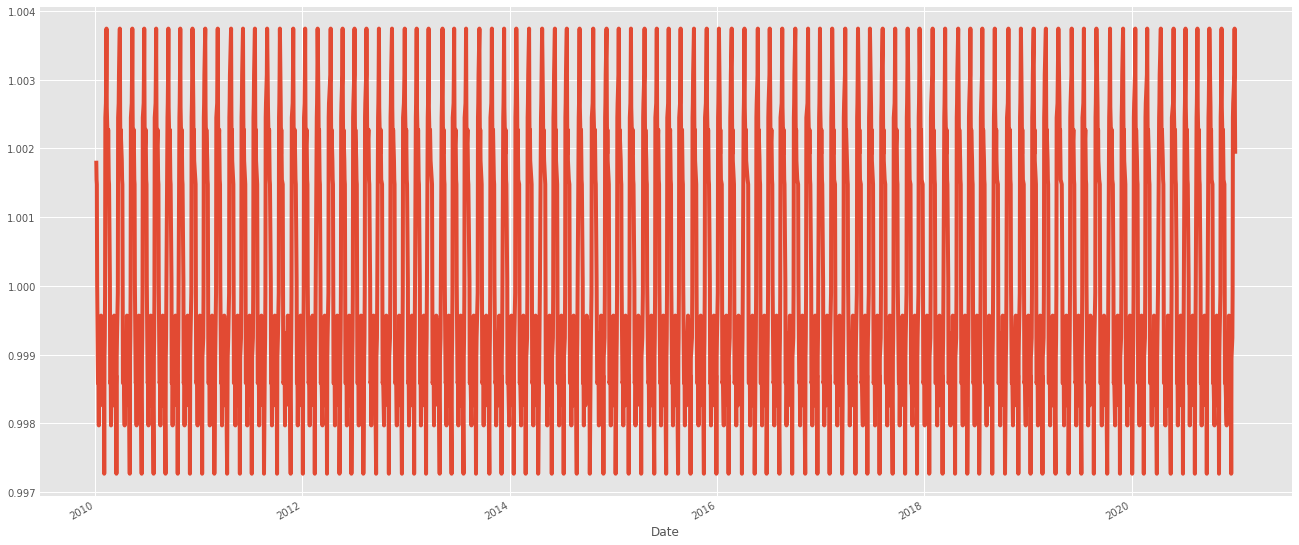

In [94]:
plt.figure(figsize=(20,10))
s_dec_mul.seasonal.plot()
plt.show()

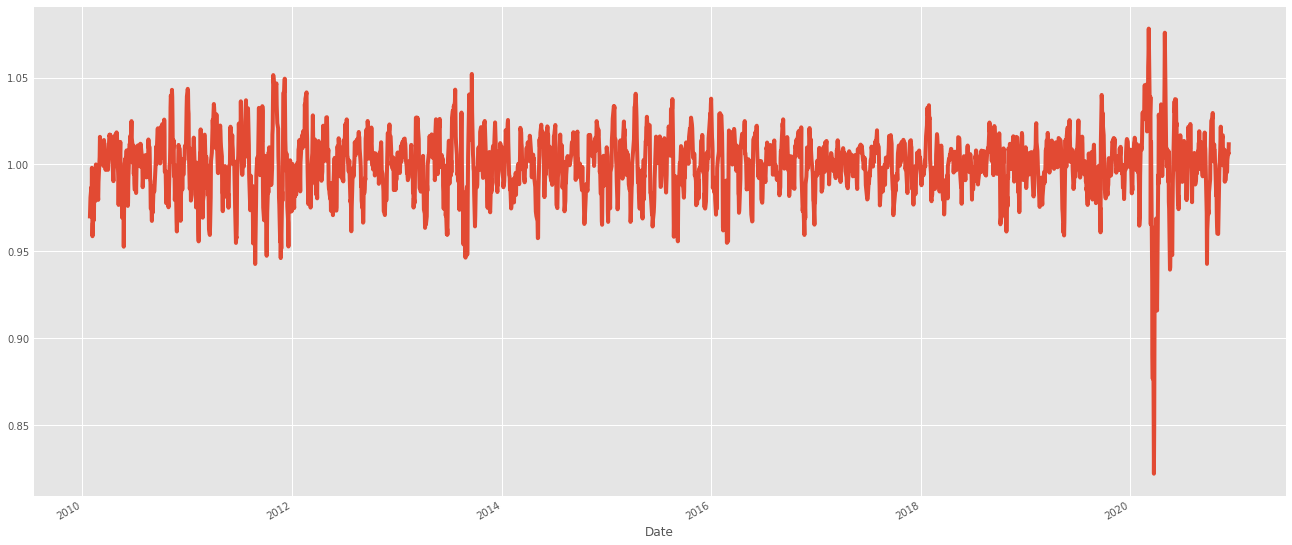

In [95]:
plt.figure(figsize=(20,10))
s_dec_mul.resid.plot()
plt.show()

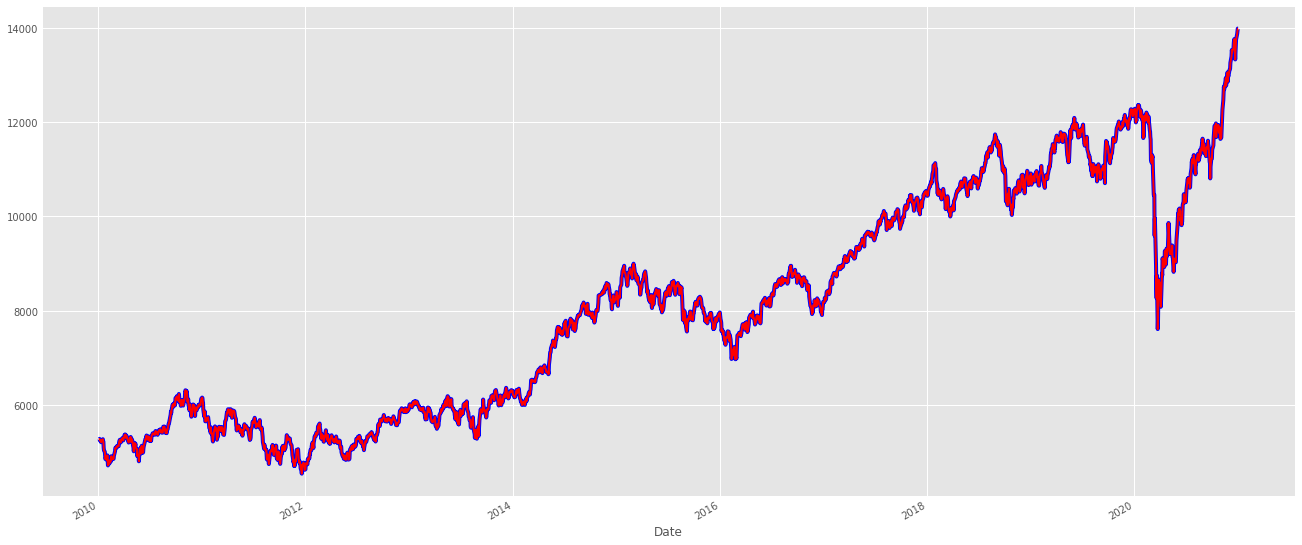

In [96]:
deseason = df['Nifty50'] - s_dec_mul.seasonal
plt.figure(figsize=(20,10))
df['Nifty50'].plot(color = "blue")
deseason.plot(color = "red" , lw = 2)
plt.show()

In [97]:
%matplotlib qt
from matplotlib import animation

x = df.index[-500:]
y = df['Nifty50'][-500:]

# animation line plot example

fig, ax = plt.subplots(1, 1, figsize = (20, 7))

def animate(i):
    ax.cla() # clear the previous image
    ax.plot(x[:i], y[:i]) # plot the line

anim = animation.FuncAnimation(fig, animate, frames = len(x)+1, interval = 0.01, repeat=False)
# anim.save('plot.gif')
# plt.show()



In [ ]:
%matplotlib inline